In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib nbagg

In [4]:
import sys

In [5]:
import pandas as pd

In [6]:
import scipy.interpolate as sci

In [7]:
from scipy import signal

In [8]:
from datetime import datetime, timedelta

In [9]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [10]:
uvic_sci_hour_temp = np.zeros(len(all_hour) - 2)
uvic_sci_hour_time = np.zeros(len(all_hour) - 2)
for i in range(2, len(all_hour)):
    uvic_sci_hour_time[i-2] = all_hour[i][0]    
    uvic_sci_hour_temp[i-2] = all_hour[i][-3]

In [11]:
epoch = datetime(1, 1, 1)
uvic_sci_hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in uvic_sci_hour_time]

In [125]:
hour_res_18_time = []
hour_res_18_temp = []
hour_res_18_time_float = []
list_of_nans = []

for i in range(len(uvic_sci_hour_time)):
    time = uvic_sci_hour_time_pretty[i]
    if time.year == 2018:
        hour_res_18_temp.append(uvic_sci_hour_temp[i])
        hour_res_18_time.append(time)
        hour_res_18_time_float.append(uvic_sci_hour_time[i])
        
        if np.isnan(uvic_sci_hour_temp[i]):
            print(len(hour_res_18_temp) - 1)
            list_of_nans.append(len(hour_res_18_temp) - 1)
    
    if time.year == 2019:
        print()
        print("len(hour_res_18_temp) = ", len(hour_res_18_temp))
        print()
        print("Done")
        break

641
1658

len(hour_res_18_temp) =  8760

Done


In [150]:
#fills in the NaN values for what we're working with, using linear interpolation - works mainly for discrete NaN values. 
filler_time = hour_res_18_time_float.copy()
filler_temp = hour_res_18_temp.copy()

for i in range(len(list_of_nans)):
    filler_time.pop(list_of_nans[i] - i)
    filler_temp.pop(list_of_nans[i] - i)
    
filler_fn = sci.interp1d(filler_time, filler_temp)

for i in list_of_nans:
    hour_res_18_temp[i] = filler_fn(hour_res_18_time_float[i])

In [151]:
#T_sub; Subsample 1
hour_res_0618_time = hour_res_18_time[::int(0.6*24)]
hour_res_0618_temp = hour_res_18_temp[::int(0.6*24)]

#T_sub; Subsample 2
hour_res_04518_time = hour_res_18_time[::int(0.45*24)]
hour_res_04518_temp = hour_res_18_temp[::int(0.45*24)]

<IPython.core.display.Javascript object>


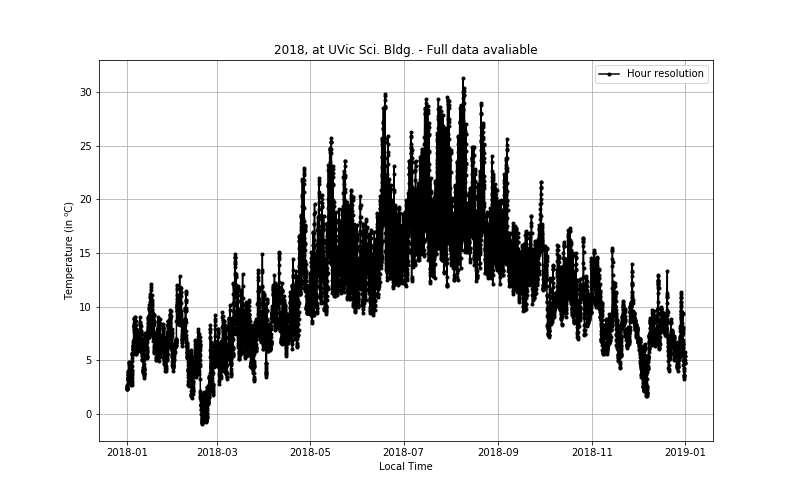

In [152]:
plt.close()
plt.figure(figsize=(11,7))
plt.plot(hour_res_18_time, hour_res_18_temp, 'k.-', label="Hour resolution")
plt.title("2018, at UVic Sci. Bldg. - Full data avaliable")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in \u2070C)")
plt.grid(True)
plt.legend()

In [153]:
plt.close()

<IPython.core.display.Javascript object>


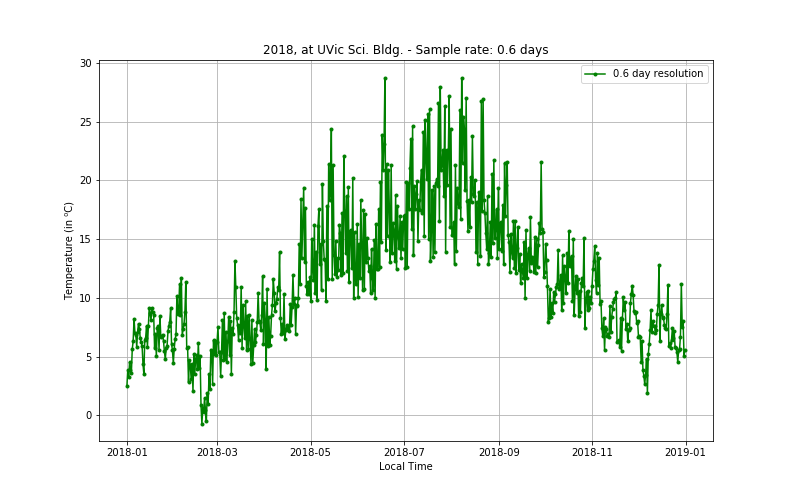

In [154]:
plt.close()
plt.figure(figsize=(11,7))
plt.plot(hour_res_0618_time, hour_res_0618_temp, 'g.-', label="0.6 day resolution")
plt.title("2018, at UVic Sci. Bldg. - Sample rate: 0.6 days")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in \u2070C)")
plt.grid(True)
plt.legend()

In [155]:
plt.close()

<IPython.core.display.Javascript object>


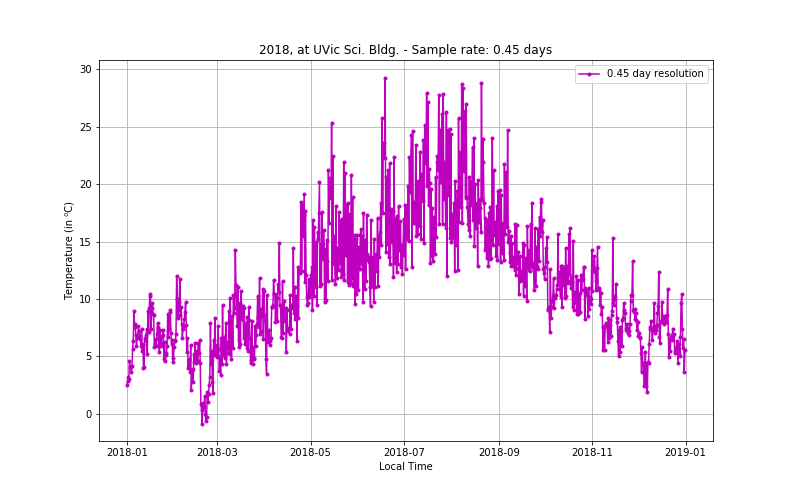

In [156]:
plt.close()
plt.figure(figsize=(11,7))
plt.plot(hour_res_04518_time, hour_res_04518_temp, 'm.-', label="0.45 day resolution")
plt.title("2018, at UVic Sci. Bldg. - Sample rate: 0.45 days")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in \u2070C)")
plt.grid(True)
plt.legend()

In [157]:
plt.close()

In [158]:
cubic_spline_fit_06 = sci.CubicSpline(hour_res_18_time_float[::int(0.6*24)], hour_res_0618_temp)

In [159]:
cubic_spline_fit_045 = sci.CubicSpline(hour_res_18_time_float[::int(0.45*24)], hour_res_04518_temp)

In [160]:
hour_rec_0618 = cubic_spline_fit_06(hour_res_18_time_float) #T_rec; Subsample 1

In [161]:
hour_rec_04518 = cubic_spline_fit_045(hour_res_18_time_float) #T_rec; Subsample 2

<IPython.core.display.Javascript object>


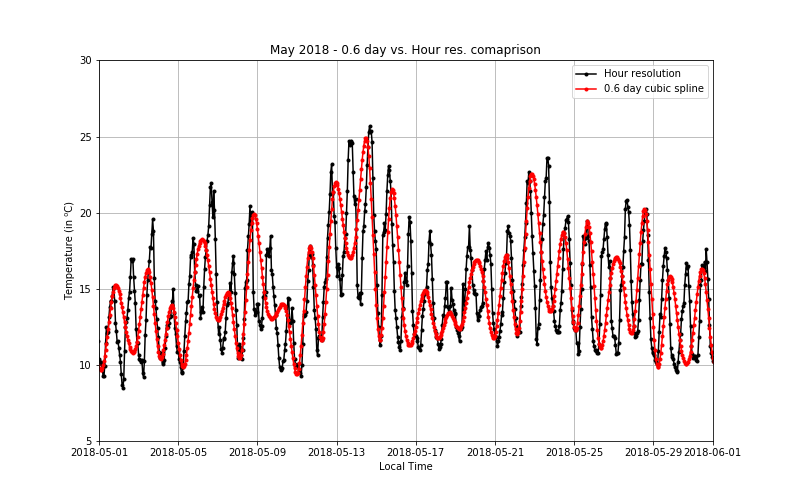

In [162]:
plt.close()
plt.figure(figsize=(11,7))
plt.plot(hour_res_18_time, hour_res_18_temp, 'k.-', label="Hour resolution")
plt.plot(hour_res_18_time, hour_rec_0618, 'r.-', label="0.6 day cubic spline")
plt.title("May 2018 - 0.6 day vs. Hour res. comaprison")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in \u2070C)")
plt.xlim(datetime(2018, 5, 1), datetime(2018, 6, 1))
plt.ylim(5, 30)
plt.grid(True)
plt.legend()

In [163]:
plt.close()

<IPython.core.display.Javascript object>


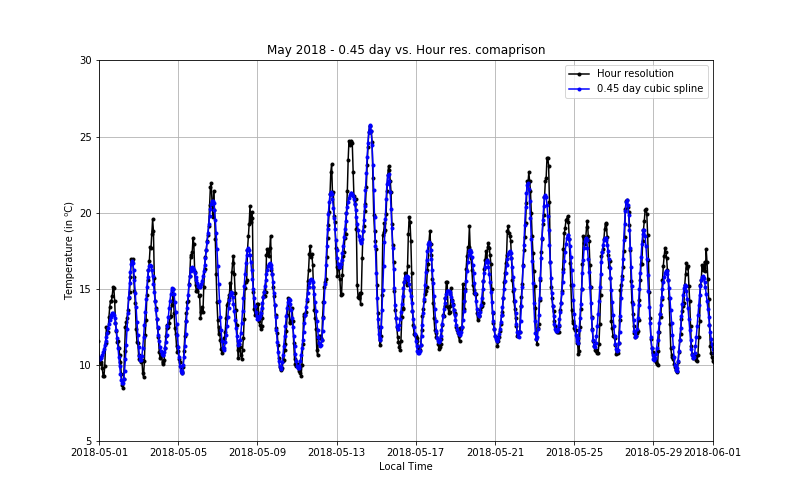

In [164]:
plt.close()
plt.figure(figsize=(11,7))
plt.plot(hour_res_18_time, hour_res_18_temp, 'k.-', label="Hour resolution")
plt.plot(hour_res_18_time, hour_rec_04518, 'b.-', label="0.45 day cubic spline")
plt.title("May 2018 - 0.45 day vs. Hour res. comaprison")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in \u2070C)")
plt.xlim(datetime(2018, 5, 1), datetime(2018, 6, 1))
plt.ylim(5, 30)
plt.grid(True)
plt.legend()

In [165]:
plt.close()

In [166]:
fs0 = 1/3600 #Sampling frequncy = 1/hr = 1/3600s

In [167]:
fs1 = fs0/int(0.6*24)

In [168]:
fs2 = fs0/int(0.45*24)

In [169]:
f1, PSD_1 = signal.welch(hour_res_18_temp, fs0, 'flattop', len(hour_res_18_temp), scaling='spectrum') #Original data's power spectrum

In [170]:
f2, PSD_2 = signal.welch(hour_res_0618_temp, fs1, 'flattop', len(hour_res_0618_temp), scaling='spectrum') #Subsample 1's power spectrum

In [171]:
f3, PSD_3 = signal.welch(hour_rec_0618, fs0, 'flattop', len(hour_rec_0618), scaling='spectrum') #Cubic spline fit 1's power spectrum

In [172]:
f4, PSD_4 = signal.welch(hour_res_04518_temp, fs2, 'flattop', len(hour_res_04518_temp), scaling='spectrum') #Subsample 2's power spectrum

In [173]:
f5, PSD_5 = signal.welch(hour_rec_04518, fs0, 'flattop', len(hour_rec_04518), scaling='spectrum') #Cubic spline fit 2's power spectrum

<IPython.core.display.Javascript object>


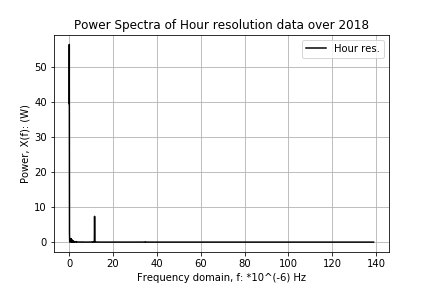

<IPython.core.display.Javascript object>


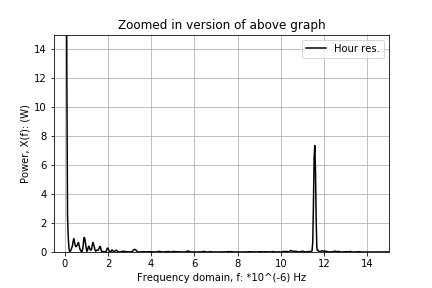

In [186]:
plt.close()
plt.close()

plt.figure()
plt.plot(f1*1e6, PSD_1, 'k-', label="Hour res.")
plt.title("Power Spectra of Hour resolution data over 2018")
plt.grid(True)
plt.xlabel("Frequency domain, f: *10^(-6) Hz")
plt.ylabel("Power, X(f): (W)")
plt.legend()

plt.figure()
plt.plot(f1*1e6, PSD_1, 'k-', label="Hour res.")
plt.title("Zoomed in version of above graph")
plt.grid(True)
plt.xlabel("Frequency domain, f: *10^(-6) Hz")
plt.ylabel("Power, X(f): (W)")
plt.ylim(0, 15)
plt.xlim(-0.5, 15)
plt.legend()

In [188]:
plt.close()
plt.close()

<IPython.core.display.Javascript object>


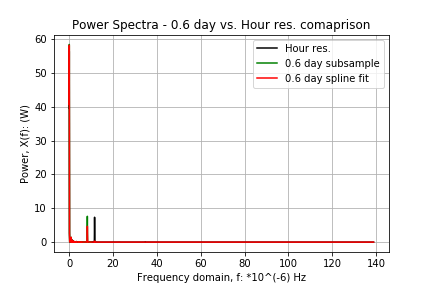

<IPython.core.display.Javascript object>


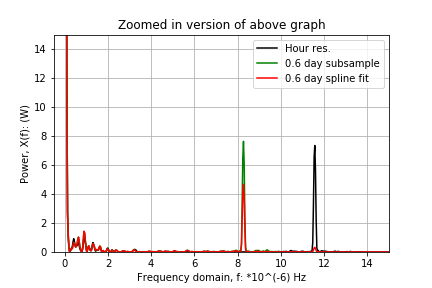

In [194]:
plt.close()
plt.close()

plt.figure()
plt.plot(f1*1e6, PSD_1, 'k-', label="Hour res.")
plt.plot(f2*1e6, PSD_2, 'g-', label="0.6 day subsample")
plt.plot(f3*1e6, PSD_3, 'r-', label='0.6 day spline fit')
plt.title("Power Spectra - 0.6 day vs. Hour res. comaprison")
plt.grid(True)
plt.xlabel("Frequency domain, f: *10^(-6) Hz")
plt.ylabel("Power, X(f): (W)")
plt.legend()

plt.figure()
plt.plot(f1*1e6, PSD_1, 'k-', label="Hour res.")
plt.plot(f2*1e6, PSD_2, 'g-', label="0.6 day subsample")
plt.plot(f3*1e6, PSD_3, 'r-', label='0.6 day spline fit')
plt.title("Zoomed in version of above graph")
plt.grid(True)
plt.xlabel("Frequency domain, f: *10^(-6) Hz")
plt.ylabel("Power, X(f): (W)")
plt.ylim(0, 15)
plt.xlim(-0.5, 15)
plt.legend()

In [195]:
plt.close()
plt.close()

<IPython.core.display.Javascript object>


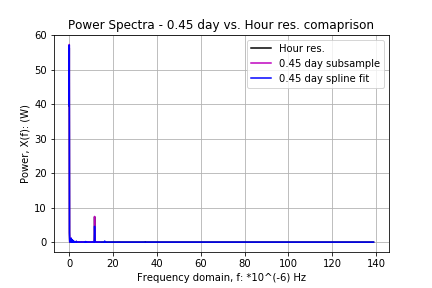

<IPython.core.display.Javascript object>


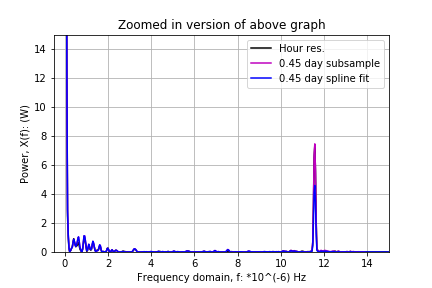

In [191]:
plt.close()
plt.close()

plt.figure()
plt.plot(f1*1e6, PSD_1, 'k-', label="Hour res.")
plt.plot(f4*1e6, PSD_4, 'm-', label="0.45 day subsample")
plt.plot(f5*1e6, PSD_5, 'b-', label='0.45 day spline fit')
plt.title("Power Spectra - 0.45 day vs. Hour res. comaprison")
plt.grid(True)
plt.xlabel("Frequency domain, f: *10^(-6) Hz")
plt.ylabel("Power, X(f): (W)")
plt.legend()

plt.figure()
plt.plot(f1*1e6, PSD_1, 'k-', label="Hour res.")
plt.plot(f4*1e6, PSD_4, 'm-', label="0.45 day subsample")
plt.plot(f5*1e6, PSD_5, 'b-', label='0.45 day spline fit')
plt.title("Zoomed in version of above graph")
plt.grid(True)
plt.xlabel("Frequency domain, f: *10^(-6) Hz")
plt.ylabel("Power, X(f): (W)")
plt.ylim(0, 15)
plt.xlim(-0.5, 15)
plt.legend()

In [192]:
plt.close()
plt.close()

## Inferences
1. Raw data shows frequency peaks at
        a. 0Hz -> Expected and not uncommon for not purely periodic data; expect to see this in all subsamples of this data (as was observed).
        b. 11.57*10^(-6)Hz (approx.) -> Represents 24 hour cycle; weather is predictable from day to day; 
        c. Low noise fuzz
2. 0.6 day sampling rate:
        a. Both subsample and spline fit show frequency peak at 8.2*10^(-6)Hz (approx.) -> sampling rate/2 (= 19.29*10^(-6)Hz/2 = 9.65*10^(-6)Hz) > 24 hour cycle {i.e. data trying to observe is above Nyquist frequency -> can't be observed and therefore is misrepresented in spectrogram}
        b. Spline fit does show a tiny influence of 24 hour cycle frequency... implying that the spline fit does recover a litte bit of the lost information
        c. Spline fit time series cuts off and doesn't show higher temperature fluctuations of the raw data -> data is lost by being smoothed over too much. Also, there seems to be an offset in peaks. Overal, spline fit is poorly correlated with orginal data.
        d. Low noise fuzz is amplified slightly. Probably due to cutting off of higher frequencies.
3. 0.45 day sampling rate:
        a. Both subsample and spline fit show frequency peak representing 24 hour cycle -> sampling rate/2 (= 25.72*10^(-6)Hz/2 = 13.44*10^(-6)Hz) < 24 hour cycle {i.e. data trying to observe is within Nyquist frequency of subsample and, therefore, data recreated from subsample}
        b. Spline fit time series cuts off... but not as much as in the 0.6 day sampling rate. Also, offset is lower. This means that while data is still lost, 0.45 day spline fit is better correlated with original data than 0.6 day spline fit. This is expected, as resolution is better (i.e. sampling rate is higher).
        c. Low noise fuzz is amplified slightly. Probably due to cutting off of higher frequencies.